Niall Carbery 22380966

<b>Consider the quantum circuit presented in Fig. 1. The data qubit (qubit 2) and two auxiliary qubits are used
in the three-qubit repetition code for phase flip errors. After the encoding block, the three qubits experience
a phase-flip (Z-operator) error channel. In this channel, qubits 1 and qubit 3 are unchanged, while qubit 2
experiences a Pauli-Z error with probability $p_z$. At the end of the channel (after snapshot 1), the three qubits
decoded and measured (at snapshot 2).</b>

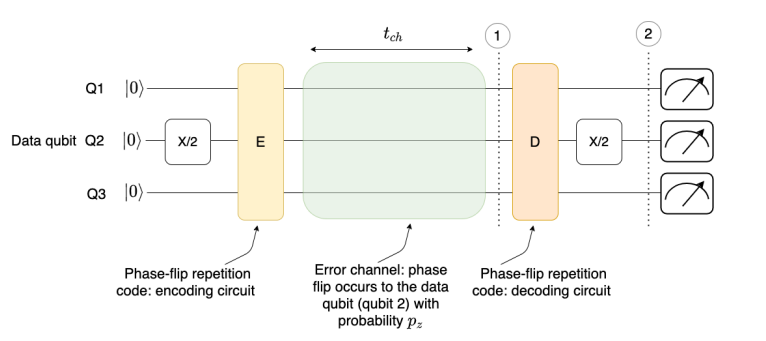

Encoding and Decoding achieved with two Cnot gates with target on data quibit two and three hadamarad gates to rotate on to the right basis, decoding achieved similariliy. Using Root X because X/2 is not unitary, We add a third quibit in 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tch = np.array([0, 6, 11, 16, 21, 26, 31, 36, 41, 46, 50])
pz = np.array([0.00987, 0.0557, 0.0974, 0.135, 0.169, 0.199, 0.227, 0.252, 0.275, 0.295, 0.306])


In [3]:
def dagger(state):
    return np.transpose(np.conj(state))

indentity = np.array([[1,0],[0,1]])
zero = np.array([[1], [0]])
H_gate = (1/np.sqrt(2))*np.array([[1 ,1], [1, -1]])

cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
upside_down_cnot = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

rootx = 1/2*np.array([[1+1j,1-1j],[1-1j, 1+1j]])
pauli_X = np.array([[0,1],[1,0]])
pauli_Y = np.array([[0,-1j],[1j,0]])
pauli_Z = np.array([[1,0],[0,-1]])
xhalf = np.array([[np.cos(1/4),-1j*np.sin(1/4)],[-1j*np.sin(1/4),np.cos(1/4)]])


def three(a, b, c):
    return np.kron(np.kron(a, b), c)

psi1 = three(H_gate, H_gate, H_gate)@np.kron(indentity, cnot_gate)@np.kron(upside_down_cnot, indentity)@three(indentity, rootx, indentity)
psi1_other = three(H_gate, H_gate, H_gate)@np.kron(indentity, cnot_gate)@np.kron(upside_down_cnot, indentity)@three(indentity, xhalf, indentity)

end_psi1 = three(indentity, rootx, indentity)@np.kron(upside_down_cnot, indentity)@np.kron(indentity, cnot_gate)@three(H_gate, H_gate, H_gate)
end_psi1_other = three(indentity, xhalf, indentity)@np.kron(upside_down_cnot, indentity)@np.kron(indentity, cnot_gate)@three(H_gate, H_gate, H_gate)



In [4]:
density_psi1 = psi1@three(zero, zero, zero)@dagger(psi1@three(zero, zero, zero))
print(density_psi1)

[[0.125+0.j    0.   -0.125j 0.   -0.125j 0.125+0.j    0.   -0.125j
  0.125+0.j    0.125+0.j    0.   -0.125j]
 [0.   +0.125j 0.125+0.j    0.125+0.j    0.   +0.125j 0.125+0.j
  0.   +0.125j 0.   +0.125j 0.125+0.j   ]
 [0.   +0.125j 0.125+0.j    0.125+0.j    0.   +0.125j 0.125+0.j
  0.   +0.125j 0.   +0.125j 0.125+0.j   ]
 [0.125+0.j    0.   -0.125j 0.   -0.125j 0.125+0.j    0.   -0.125j
  0.125+0.j    0.125+0.j    0.   -0.125j]
 [0.   +0.125j 0.125+0.j    0.125+0.j    0.   +0.125j 0.125+0.j
  0.   +0.125j 0.   +0.125j 0.125+0.j   ]
 [0.125+0.j    0.   -0.125j 0.   -0.125j 0.125+0.j    0.   -0.125j
  0.125+0.j    0.125+0.j    0.   -0.125j]
 [0.125+0.j    0.   -0.125j 0.   -0.125j 0.125+0.j    0.   -0.125j
  0.125+0.j    0.125+0.j    0.   -0.125j]
 [0.   +0.125j 0.125+0.j    0.125+0.j    0.   +0.125j 0.125+0.j
  0.   +0.125j 0.   +0.125j 0.125+0.j   ]]


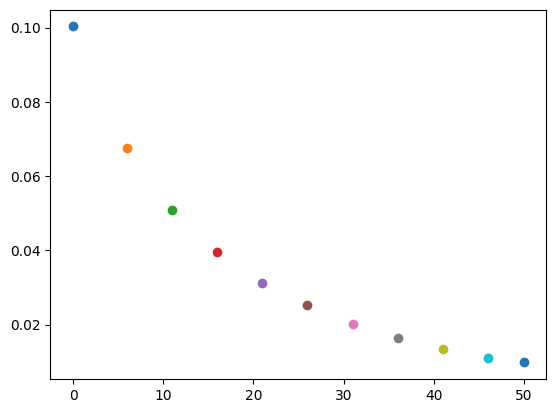

In [5]:
def error_matrix(prob):
    return three(indentity, np.sqrt(1-prob)*indentity+np.sqrt(prob)*pauli_Z, indentity)

for i in range(len(tch)):
    plt.scatter(tch[i], np.abs(((error_matrix(pz[i])@psi1@three(zero, zero,zero))[2])[0])**2)


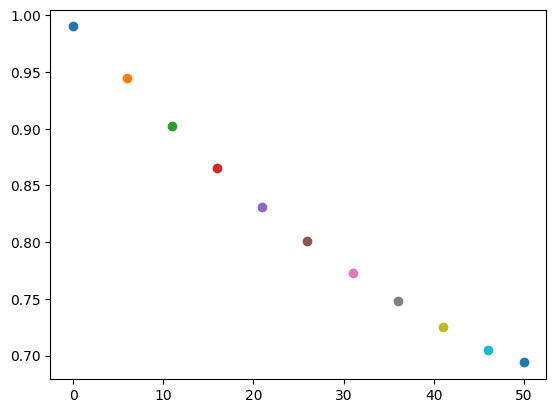

In [6]:
for i in range(len(tch)):
    plt.scatter(tch[i], np.abs(((end_psi1@error_matrix(pz[i])@psi1@three(zero, zero, zero))[2])[0])**2)